**匯入套件**

In [3]:
匯入套件
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

**取得證交所上市公司個股日成交資訊**

In [4]:
# "台積電"股票代號
stock_id = '2330'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = 20241101

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240916&stockNo=2330
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20250916


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/09/01,"23,022,319","26,647,241,918","1,150.00","1,165.00","1,145.00","1,165.00",+5.00,"41,416"
1,114/09/02,"14,994,018","17,436,038,175","1,170.00","1,175.00","1,155.00","1,160.00",-5.00,"24,784"
2,114/09/03,"20,211,322","23,350,634,915","1,155.00","1,160.00","1,145.00","1,160.00",0.00,"29,992"
3,114/09/04,"25,311,450","29,560,102,956","1,170.00","1,175.00","1,160.00","1,160.00",0.00,"22,577"
4,114/09/05,"27,931,124","32,835,192,457","1,175.00","1,180.00","1,170.00","1,180.00",+20.00,"24,609"
5,114/09/08,"28,393,035","33,731,539,720","1,195.00","1,195.00","1,180.00","1,180.00",0.00,"35,672"
6,114/09/09,"35,720,097","42,775,822,699","1,195.00","1,200.00","1,190.00","1,200.00",+20.00,"46,420"
7,114/09/10,"43,516,678","53,209,559,355","1,220.00","1,230.00","1,215.00","1,225.00",+25.00,"82,407"
8,114/09/11,"34,811,140","43,495,621,610","1,255.00","1,260.00","1,235.00","1,240.00",+15.00,"68,103"
9,114/09/12,"28,224,895","35,417,505,350","1,255.00","1,260.00","1,250.00","1,260.00",+20.00,"49,823"


**抓取特定某段時間區間 9/10~9/16**

In [5]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2025/09/01'
end_date = '2025/09/16'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

print(filtered_df)

           日期        成交股數            成交金額       開盤價       最高價       最低價  \
0  2025-09-01  23,022,319  26,647,241,918  1,150.00  1,165.00  1,145.00   
1  2025-09-02  14,994,018  17,436,038,175  1,170.00  1,175.00  1,155.00   
2  2025-09-03  20,211,322  23,350,634,915  1,155.00  1,160.00  1,145.00   
3  2025-09-04  25,311,450  29,560,102,956  1,170.00  1,175.00  1,160.00   
4  2025-09-05  27,931,124  32,835,192,457  1,175.00  1,180.00  1,170.00   
5  2025-09-08  28,393,035  33,731,539,720  1,195.00  1,195.00  1,180.00   
6  2025-09-09  35,720,097  42,775,822,699  1,195.00  1,200.00  1,190.00   
7  2025-09-10  43,516,678  53,209,559,355  1,220.00  1,230.00  1,215.00   
8  2025-09-11  34,811,140  43,495,621,610  1,255.00  1,260.00  1,235.00   
9  2025-09-12  28,224,895  35,417,505,350  1,255.00  1,260.00  1,250.00   
10 2025-09-15  26,019,117  32,646,870,966  1,260.00  1,260.00  1,250.00   

         收盤價    漲跌價差    成交筆數  
0   1,165.00   +5.00  41,416  
1   1,160.00   -5.00  24,784  
2   1,

**取得連續月份資料**

In [6]:
# 設定查找時間
date_list = ['20250701', '20250801', '20250901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   114年07月01日   1.57   113  21.49  6.16  114/1
1   114年07月02日   1.57   113  21.49  6.16  114/1
2   114年07月03日   1.56   113  21.59  6.19  114/1
3   114年07月04日   1.57   113  21.49  6.16  114/1
4   114年07月07日   1.57   113  21.39  6.14  114/1
5   114年07月08日   1.57   113  21.39  6.14  114/1
6   114年07月09日   1.56   113  21.59  6.19  114/1
7   114年07月10日   1.55   113  21.79  6.25  114/1
8   114年07月11日   1.55   113  21.79  6.25  114/1
9   114年07月14日   1.55   113  21.69  6.22  114/1
10  114年07月15日   1.53   113  21.98  6.31  114/1
11  114年07月16日   1.50   113  22.38  6.42  114/1
12  114年07月17日   1.50   113  22.38  6.42  114/1
13  114年07月18日   1.47   113  22.88  6.56  114/1
14  114年07月21日   1.48   113  22.78  6.53  114/1
15  114年07月22日   1.50   113  22.38  6.42  114/1
16  114年07月23日   1.48   113  22.68  6.51  114/1
17  114年07月24日   1.48   113  22.68  6.51  114/1
18  114年07月25日   1.48   113  22.68  6.51  114/1
19  114年07月28日   1.48   113  22.68  6.51

**可視化收盤價折線圖**

/tmp/ipython-input-2268942305.py:22: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊
/tmp/ipython-input-2268942305.py:22: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊
/tmp/ipython-input-2268942305.py:22: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊
/tmp/ipython-input-2268942305.py:22: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊
/tmp/ipython-input-2268942305.py:22: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊
/tmp/ipython-input-2268942305.py:22: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from font(s) DejaVu Sans.
 

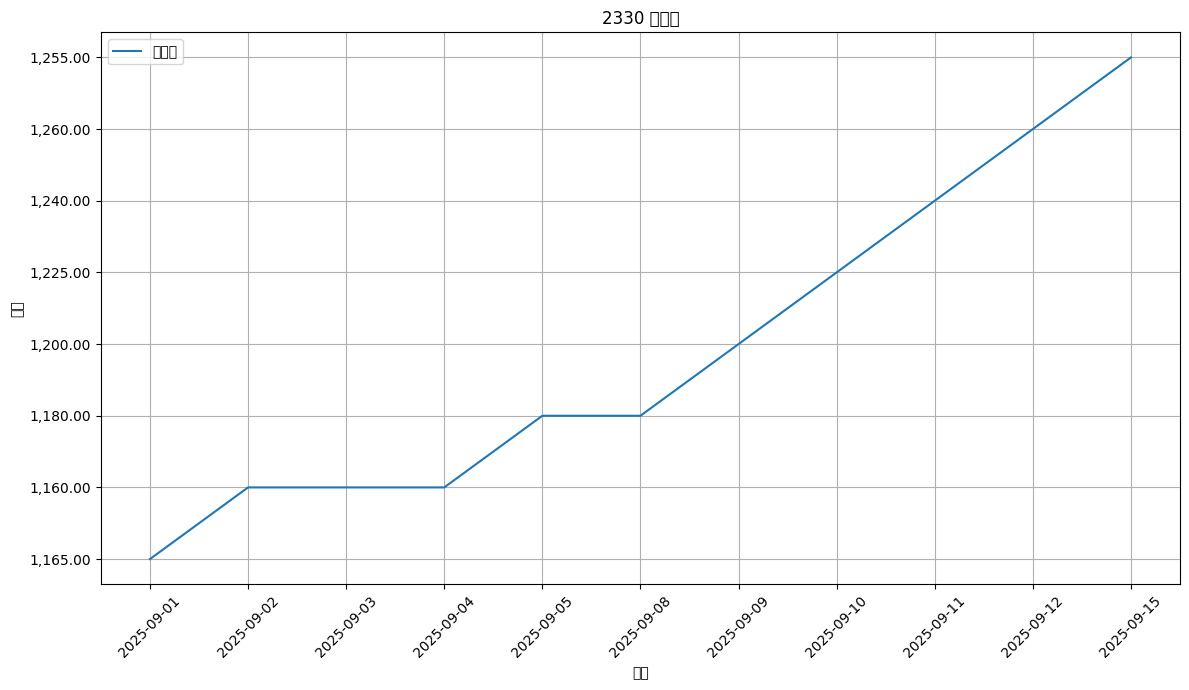

In [10]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(filtered_df['收盤價'], label='收盤價')

# 設定 x 軸的時間
num = 10
date = filtered_df["日期"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id} 收盤價')   # 將股票代號設為圖標
plt.xlabel('日期')         # x 軸標籤
plt.ylabel('價格')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()